## Exercise 10 - Hypothesis Testing

Marit Svendby Otervik

In [1]:
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import csv

### 1. Hurricanes per year

In [2]:
#Poisson distribution
mu = 6.3 #historic average = expected value
sigma_mu = np.sqrt(mu)

#Calculating probability for 15 or more observations
x0 = 15

Z = (x0-mu)/sigma_mu
print(Z)

3.4661629670697414


This Z score is above 3 with respect to a normal distribution, making it statistically significant in this case (according to the exercise description).

### 2. Pairwise t-test

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10

mean_pre = np.mean(pre)
mean_post = np.mean(post)

sigma2_pre = np.var(pre,ddof=1)
sigma2_post = np.var(post,ddof=1)

sigma = np.sqrt((sigma2_pre + sigma2_post)/2)

T = (mean_pre - mean_post)/(sigma* np.sqrt(2/n))
print("T =",T)

pvalue = stats.t.cdf(T,n-1) + (1. - stats.t.cdf(-T,n-1))
print("p-value =",pvalue)

T = -3.786997938137629
p-value = 0.004302464132864604


Since the p-value is very small (0.4%), we reject the null hypothesis. 

### 3. Curve fitting of temperature in Alaska

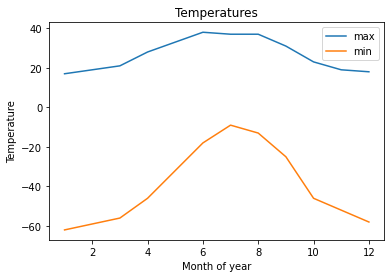

In [4]:
maxT = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
minT = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
t = np.arange(1,13)

plt.figure()
plt.title("Temperatures")
plt.plot(t,maxT, label = "max")
plt.plot(t,minT, label = "min")
plt.xlabel("Month of year")
plt.ylabel("Temperature")
plt.legend()
plt.show()

From the plot one can see that a suitable function for this dataset is a sin function.

In [5]:
def f(x, A, w, phi, C):
    return A * np.sin(w*x+phi) + C

In [6]:
#Maximum values

popt_max,pcov_max = optimize.curve_fit(f,t,maxT, p0=[10,np.pi/6,np.pi/6,20], full_output=False)
print("parameters:\n", popt_max)
print("covariance matrix:\n", pcov_max)
print("A = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("w = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("phi = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("C = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))
    

parameters:
 [-10.58169954   0.59227424   0.73066262  27.94963542]
covariance matrix:
 [[ 0.16816441  0.00085885 -0.00522752 -0.00655279]
 [ 0.00085885  0.00044872 -0.00296267  0.00640272]
 [-0.00522752 -0.00296267  0.02135828 -0.04203833]
 [-0.00655279  0.00640272 -0.04203833  0.18339709]]
A = -10.58 +- 0.41
w = 0.59 +- 0.02
phi = 0.73 +- 0.15
C = 27.95 +- 0.43


In [7]:
#Minimum values

popt_min,pcov_min = optimize.curve_fit(f,t,minT, p0=[25,np.pi/6,np.pi/6,-40], full_output=False)
print("parameters:\n", popt_min)
print("covariance matrix:\n", pcov_min)
print("A = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("w = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("phi = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("C = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))

parameters:
 [-25.14961936   0.60132111   0.42316895 -36.71255908]
covariance matrix:
 [[ 1.72807190e+00  2.47889953e-04  3.66652162e-03 -1.89203629e-01]
 [ 2.47889953e-04  5.30709479e-04 -3.55958448e-03  1.59998917e-02]
 [ 3.66652162e-03 -3.55958448e-03  2.70516156e-02 -1.04185549e-01]
 [-1.89203629e-01  1.59998917e-02 -1.04185549e-01  1.41858135e+00]]
A = -25.15 +- 1.31
w = 0.60 +- 0.02
phi = 0.42 +- 0.16
C = -36.71 +- 1.19


##### Plotting the two fitted curves

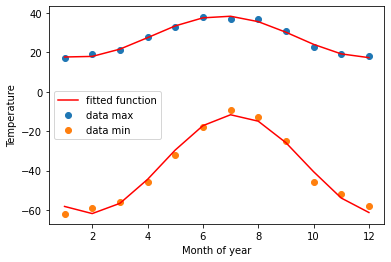

In [8]:
plt.figure()
plt.scatter(t, maxT, label='data max')
plt.scatter(t, minT, label='data min')
plt.plot(t, f(t, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='red', label='fitted function')
plt.plot(t, f(t, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='red')
plt.legend(loc='best')
plt.xlabel("Month of year")
plt.ylabel("Temperature")
plt.show()

The fit is very reasonable, displaying the nature of the periodic variations in the temperatures. The time offset is represented by the parameter phi. For the maximum temperatures phi = 0.73, and for the minimum temperatures phi = 0.42. Therefore, the curve of maximum temperatures is shifted slightlu to the left for the curve of minimum temperatures. Physically, this means that the maximum temperatures has its lowest point earlier in the year than the minimum temperatures --> The time offset is not the same.

### 4. Fit the residues

In [9]:
import pickle

In [10]:
pklfile = open("data/residuals_261.pkl", 'rb')
data = pickle.load(pklfile)
pklfile.close
residuals = data.item()['residuals']

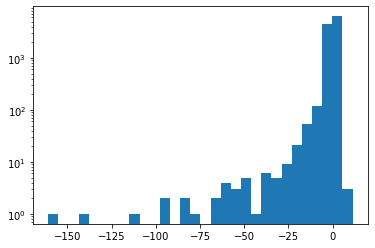

In [11]:
plt.figure()
plt.hist(residuals, 30)
plt.yscale("log")
plt.show()

### 5. Temperatures in Munich

In [12]:
data_temps = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
years_unfiltered = data_temps[:,0]
temps_unfiltered = data_temps[:,1]

#Some dates have invalid temperatures (99 or -99)
#They will be filtered out
years_with99 = years_unfiltered[years_unfiltered>2008]
temps_with99 = temps_unfiltered[years_unfiltered>2008]
years = years_with99[abs(temps_with99)<99]
temps = temps_with99[abs(temps_with99)<99]

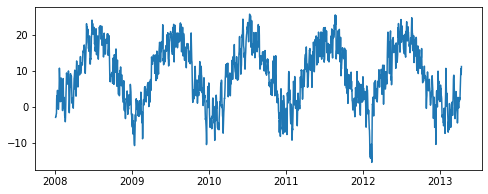

In [13]:
#plotting the filteres values
plt.figure(figsize = (8,3))
plt.plot(years,temps)
plt.show()

In [14]:
#From this plot we make initial guesses of the parameters:
a_init = 15
b_init = np.pi
c_init = 7

In [15]:
def f_temp(t,a,b,c):
    return a * np.cos(2*np.pi*t + b) + c

In [16]:
popt,pcov = optimize.curve_fit(f_temp,years,temps, p0=[a_init,b_init,c_init], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

parameters:
 [10.067145    2.88266881  9.16883799]
covariance matrix:
 [[ 1.43417054e-02  3.66859179e-05  5.35765295e-04]
 [ 3.66859179e-05  1.44033933e-04 -3.93621713e-05]
 [ 5.35765295e-04 -3.93621713e-05  7.24455249e-03]]
a = 10.07 +- 0.12
b = 2.88 +- 0.01
c = 9.17 +- 0.09


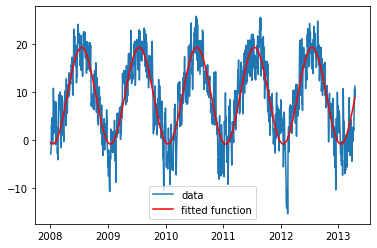

In [17]:
plt.figure()
plt.plot(years, temps, label='data')
plt.plot(years, f_temp(years, popt[0], popt[1], popt[2]), color='red', label='fitted function')
plt.legend(loc='best')
plt.show()

Overall average temperature = c = 9.17

average of hottest time = c + a = 19.24

average og coldest time = c - a = -0.9

The parameter b is the phase shift. Normally the maxima of a cosinus function is at n*2*pi, where n = 0,1,2,3,... b=2.88 shifts the maxima 2.88 to the left. Therefore making the maxima in the summer.

In [18]:
def g_temp(t,a,b,c,d):
    return a * np.cos(2*np.pi*t*b + c) + d

In [19]:
poptg,pcovg = optimize.curve_fit(g_temp,years,temps, p0=[10,3,1,9], full_output=False)
print("parameters:\n", poptg)
print("covariance matrix:\n", pcovg)
print("a = %.2f +- %.2f" % (poptg[0], np.sqrt(pcovg[0,0])))
print("b = %.2f +- %.2f" % (poptg[1], np.sqrt(pcovg[1,1])))
print("c = %.2f +- %.2f" % (poptg[2], np.sqrt(pcovg[2,2])))
print("d = %.2f +- %.2f" % (poptg[3], np.sqrt(pcovg[3,3])))

parameters:
 [  0.97145328   2.93711205 795.51157031   8.80174878]
covariance matrix:
 [[ 7.58706245e-02  2.60208375e-03 -3.28733170e+01  1.06513680e-03]
 [ 2.60208374e-03  7.68628911e-04 -9.71039448e+00 -1.76642804e-05]
 [-3.28733170e+01 -9.71039448e+00  1.22675343e+05  2.22354396e-01]
 [ 1.06513680e-03 -1.76642804e-05  2.22354396e-01  3.34963931e-02]]
a = 0.97 +- 0.28
b = 2.94 +- 0.03
c = 795.51 +- 350.25
d = 8.80 +- 0.18


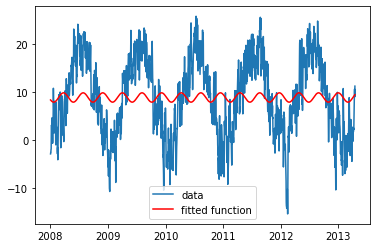

In [20]:
plt.figure()
plt.plot(years, temps, label='data')
plt.plot(years, g_temp(years, poptg[0], poptg[1], poptg[2],poptg[3]), color='red', label='fitted function')
plt.legend(loc='best')
plt.show()

This is not a good fit. The extra parameter seems to disturb the optimization of the function

##### SSR and Fisher F-test

In [21]:
#RSS of f(x)
f_vals = f_temp(years,10.07,2.88,9.17)
SSR_f = np.sum((temps-f_vals)**2)
print("SSR of f(x) =",SSR_f)

SSR of f(x) = 26798.869324279905


In [22]:
#RSS og g(x)
g_vals = g_temp(years,0.97,2.94,795.51,8.80)
SSR_g = np.sum((temps-g_vals)**2)
print("SSR of g(x) =",SSR_g)

SSR of g(x) = 125453.38776370532


In [23]:
#Relative increase in the sum of squares

rhs = (SSR_f-SSR_g)/SSR_g
print(rhs)

-0.7863838529832589


In [24]:
#Relative increase in DOF

lhs = (3 - 4)/4
print(lhs)

-0.25


One can see that the relative increase in the sum of squares is higher than the relative increase in DOF. Therefore the additioal parameter is not motivated, as one could clearly see on the plot above.